# Ley de Heaps

La Ley de Heaps establece que el crecimiento del vocabulario (V, número de palabras únicas) en un texto de tamaño N (número total de tokens) sigue la relación:

$$V(N) = K \cdot N^{\beta}$$

donde K es una constante y β suele estar entre 0.4 y 0.6 para textos en lenguaje natural. Esto implica que a medida que se procesa más texto, el vocabulario crece de forma sublineal.

Para validar esta ley, es necesario tokenizar el texto y, de forma incremental, acumular pares (N, V) y ajustar la función en escala log–log.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from Tokenizador import Tokenizador

def calcular_cumulos(file_path, step=100):
    """
    Lee un archivo de texto (codificado en iso-8859-1) y procesa línea a línea.
    Acumula de forma incremental (cada 'step' tokens) el par (N, V):
      - N: número total de tokens procesados hasta ese punto.
      - V: número de términos únicos en ese subconjunto.
    Devuelve una lista de pares.
    """
    tokenizador = Tokenizador()
    total_tokens = 0
    vocabulario = set()
    cumulos = []
    
    with open(file_path, "r", encoding="iso-8859-1") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            tokens = tokenizador.tokenizar(line)
            total_tokens += len(tokens)
            vocabulario.update(tokens)
            
            # Cada 'step' tokens se guarda un par (N, V)
            if total_tokens % step < len(tokens):  # cuando se sobrepasa un múltiplo
                cumulos.append((total_tokens, len(vocabulario)))
    
    # Asegurarse de incluir el par final
    if cumulos and cumulos[-1][0] < total_tokens:
        cumulos.append((total_tokens, len(vocabulario)))
    return cumulos

# Calcular los pares (N, V) incrementalmente
cumulos = calcular_cumulos("datos/pg2000.txt", step=100)

# Escribir los pares a un archivo txt
with open("pares.txt", "w", encoding="iso-8859-1") as f:
    for n, v in cumulos:
        f.write(f"{n} {v}\n")

In [ ]:
def ajustar_heaps(cumulos):
    """
    Ajusta la funcion V = K * N^beta en escala log-log usando np.polyfit.
    Devuelve K, beta y los arrays de N y V.
    """
    N_vals = np.array([n for n, _ in cumulos])
    V_vals = np.array([v for _, v in cumulos])
    logN = np.log(N_vals)
    logV = np.log(V_vals)
    coef = np.polyfit(logN, logV, 1)
    beta = coef[0]
    K = np.exp(coef[1])
    return K, beta, N_vals, V_vals

# Ajustar la Ley de Heaps: se realiza en escala log-log
K, beta, N_vals, V_vals = ajustar_heaps(cumulos)
print(f"Coeficientes ajustados: K = {K:.2f}, beta = {beta:.2f}")

Coeficientes ajustados: K = 8.28, beta = 0.62


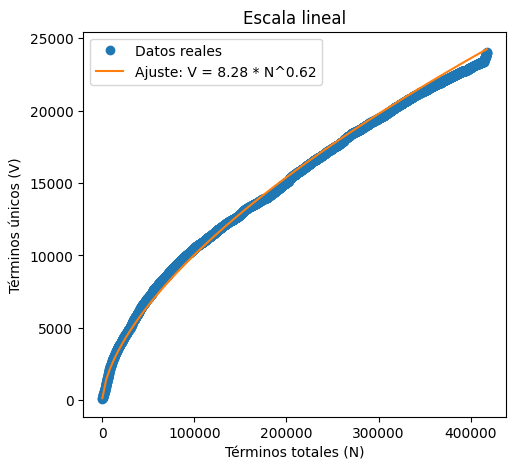

In [ ]:
# Generar valores para el ajuste
N_fit = np.linspace(N_vals.min(), N_vals.max(), 100)
V_fit = K * N_fit**beta

plt.figure(figsize=(12, 5))

# Escala lineal
plt.subplot(1, 2, 1)
plt.plot(N_vals, V_vals, "o", label="Datos reales")
plt.plot(N_fit, V_fit, "-", label=f"Ajuste: V = {K:.2f} * N^{beta:.2f}")
plt.xlabel("Términos totales (N)")
plt.ylabel("Términos únicos (V)")
plt.title("Escala lineal")
plt.legend()

In [ ]:
# Escala log-log
plt.subplot(1, 2, 2)
plt.plot(np.log(N_vals), np.log(V_vals), "o", label="Datos reales")
plt.plot(np.log(N_fit), np.log(V_fit), "-", label=f"Ajuste: V = {K:.2f} * N^{beta:.2f}")
plt.xlabel("log(N)")
plt.ylabel("log(V)")
plt.title("Escala log-log")
plt.legend()
plt.tight_layout()
plt.show()